# Q1

# ref: https://plotly.com/python/treemaps/

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/11_SevCatOneNumNestedOneObsPerGroup.csv", sep=";")

df.dropna(inplace=True)

In [2]:
df1 = df.rename(columns={'key':'pop'})

In [3]:
df1.head()

,region,subregion,pop,value
0,Asia,Southern Asia,Afghanistan,25500100
1,Europe,Northern Europe,Åland Islands,28502
2,Europe,Southern Europe,Albania,2821977
3,Africa,Northern Africa,Algeria,37900000
4,Oceania,Polynesia,American Samoa,55519


In [8]:
import plotly.express as px
fig = px.treemap(df1, path=[px.Constant("World"), 'region','pop'], 
                 values='value', 
                )
fig.show()

# Q2

In [5]:
data = df

In [6]:
data = data.groupby(['region','subregion'])['value'].sum()
data = data.reset_index()

In [7]:
dict_all = {'id':'World','datum':data['value'].sum()}
dict_lists = []
for region in set(data['region']):
    d = {}
    d['id'] = region
    d['datum'] = data[data['region']== region]['value'].sum()
    d['children'] = [{'id':i['subregion'],'datum':i['value']} for i in data[data['region']==region][['subregion','value']].to_dict('records')]
    dict_lists.append(d)
dict_all['children'] = dict_lists
data = [dict_all]

In [8]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

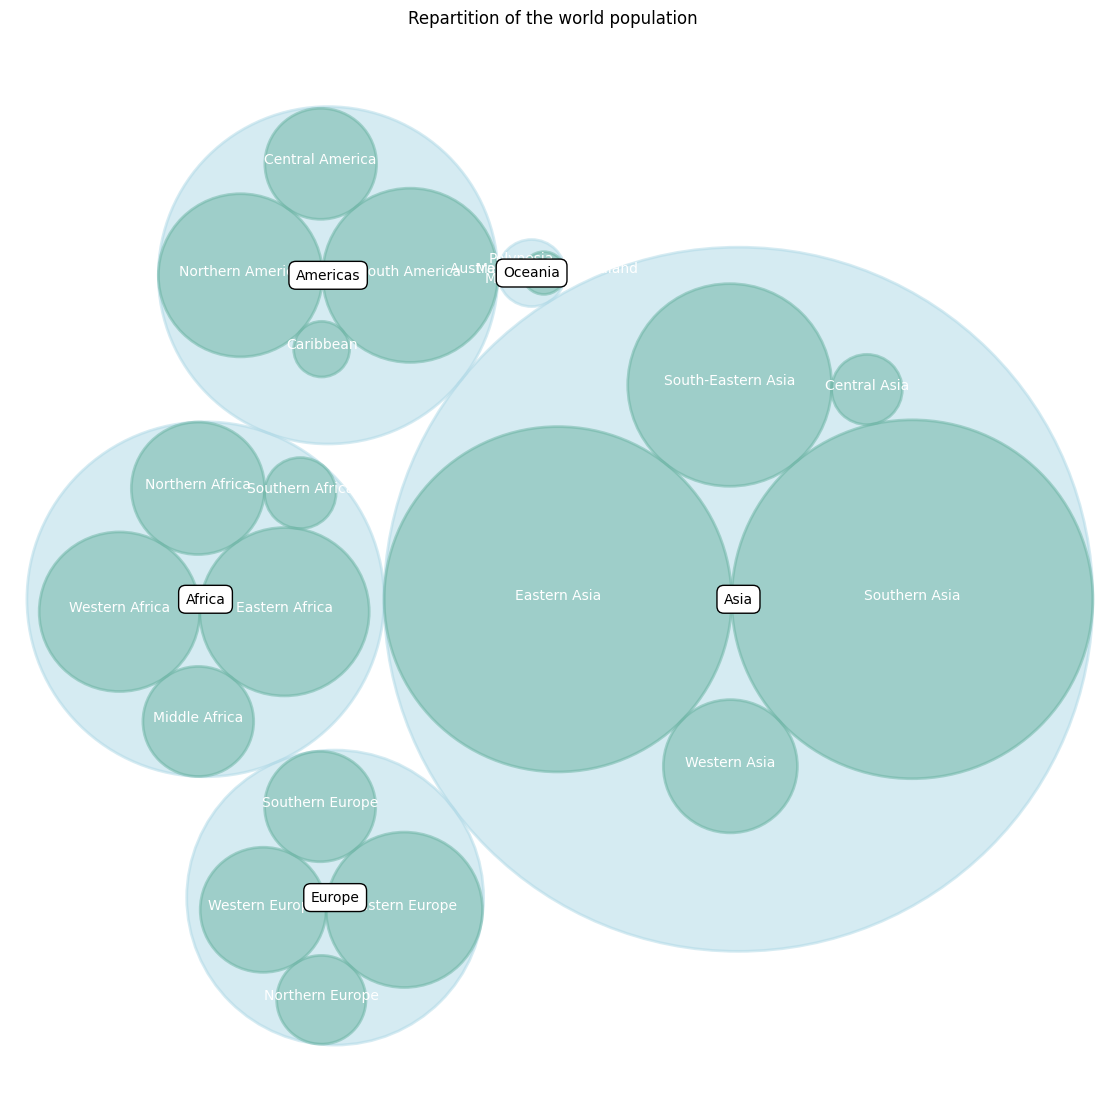

In [9]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

